In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problem Statement:

**About Company**

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.


**Problem**

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [76]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
train = pd.read_csv('/content/drive/MyDrive/Automatic Loan Prediction System/train_ctrUa4K.csv') 
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Description:


*   Loan_ID--------------> Unique Loan ID
*   Gender --------------> Male/ Female
*   Married --------------> Applicant married (Y/N)
*   Dependents ------------> Number of dependents
*   Education -------------> Applicant Education (Graduate/ Under Graduate)
*   Self_Employed ---------> Self-employed (Y/N)
*   ApplicantIncome -------> Applicant income
*   CoapplicantIncome -----> Coapplicant income
*   LoanAmount -----------> Loan amount in thousands
*   Loan_Amount_Term ------> Term of a loan in months
*   Credit_History --------> Credit history meets guidelines
*   Property_Area ---------> Urban/ Semi-Urban/ Rural
*   Loan_Status -----------> Loan approved (Y/N)













In [78]:
train.shape

(614, 13)

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


As we can see in the output....

---



*   There are 614 entries
*   There are total 13 columns
*   There are three types of datatype dtypes: float64(4), int64(1), object(8)
*   Also, We can check how many missing values available in the Non-Null Count column



In [80]:
# Drop the columns which is not relevant

train = train.drop(columns=['Loan_ID']) ## Dropping Loan ID

In [81]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## **Exploratory Data Analysis**

In [82]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

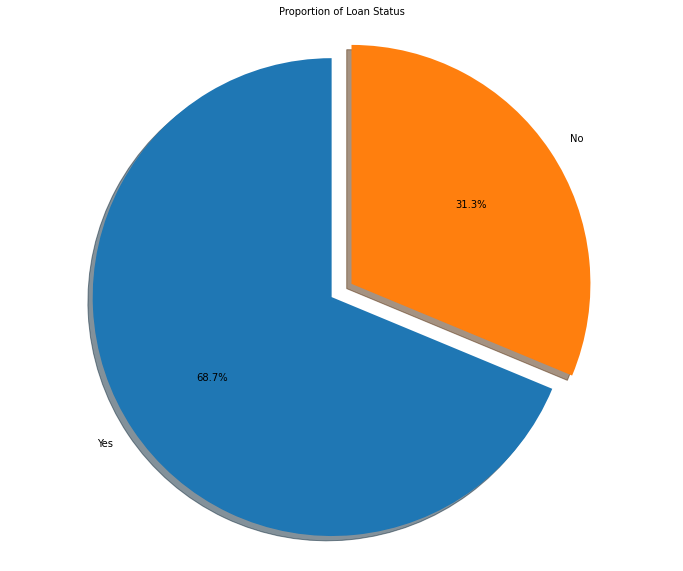

In [83]:
# Pie chart to display the amount (percentage) distribution of the Target Variable

labels = 'Yes', 'No'
sizes = [train.Loan_Status[train['Loan_Status']=='Y'].count(), train.Loan_Status[train['Loan_Status']=='N'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(12, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Loan Status", size = 10)
plt.show()

***From above pie chart,we can see that around 69% of the loan has been approved while 31% loan application was not approved, which means about 2/3rd of applicants have been granted loan.***

## **Univariate Analysis**

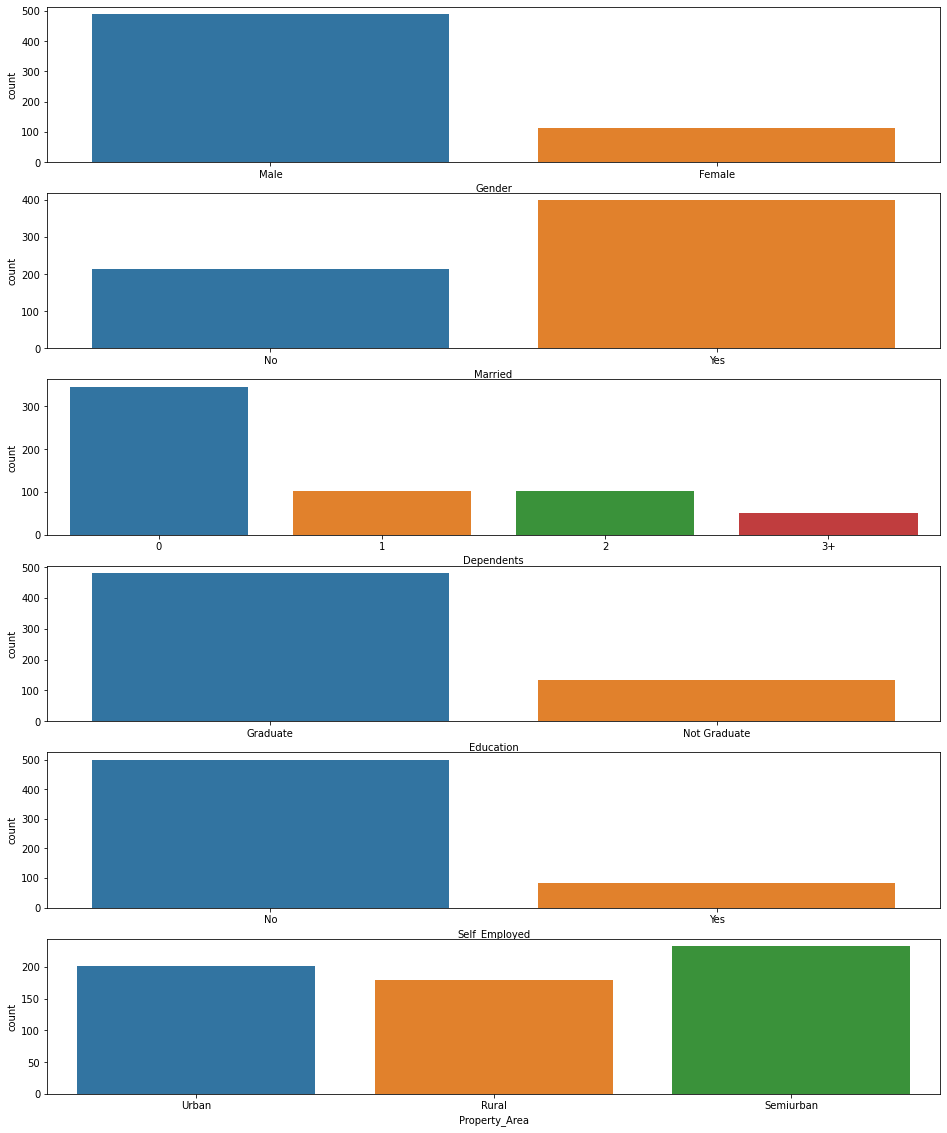

In [84]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(16, 20))

cols_ = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]

for ind, col in enumerate(cols_):
    sns.countplot(x=col, data=train, ax=ax[ind])

**Plots above convey following things about the dataset:**


1. Sex: There are more Men than Women (approx. 3x)
2. Martial Status: 2/3rd of the population in the dataset is Marred.
3. Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
4. Education: About 5/6th of the population is Graduate.
5. Employment: 5/6th of population is not self employed.
6. Property Area: More applicants from Semi-urban area.

In [85]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## **Bi-Variate Analysis**

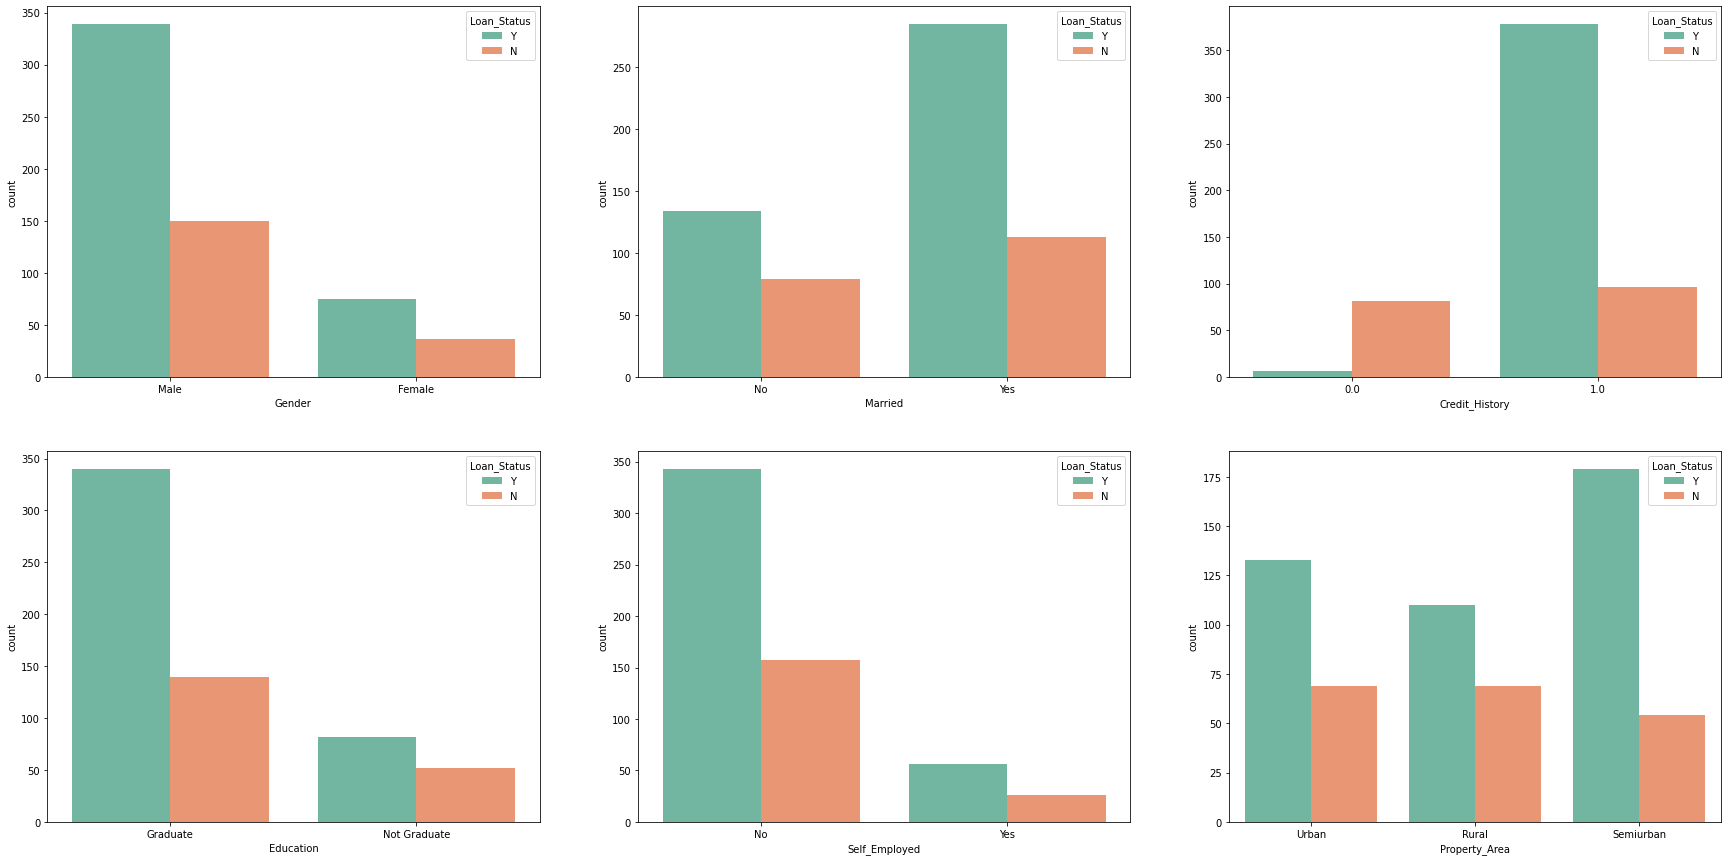

In [86]:
# Count column plots to map the dependence of 'Loan_Status' column on categorical features

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.countplot(x='Gender', hue='Loan_Status', data=train, palette='Set2', ax=ax[0][0])
sns.countplot(x='Married', hue='Loan_Status', data=train, palette='Set2', ax=ax[0][1])
sns.countplot(x='Credit_History', hue='Loan_Status', data=train, palette='Set2', ax=ax[0][2])
sns.countplot(x='Education', hue='Loan_Status', data=train, palette='Set2', ax=ax[1][0])
sns.countplot(x='Self_Employed', hue='Loan_Status', data=train, palette='Set2', ax=ax[1][1])
sns.countplot(x='Property_Area', hue='Loan_Status', data=train, palette='Set2', ax=ax[1][2])

plt.show()

**Observation from the above plots**

1. Gender: We can observe that Male applicants had more chances of getting loan in comparison with female applicants.
2. Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
3. Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval.
4. Employment: Applicants who are not self employed has higher chance of getting loan.
5. Applicant with credit history are far more likely to be accepted.
6. Property Area: More applicants from Semi-urban and also likely to be granted loans.

In [87]:
numerical_columns = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]

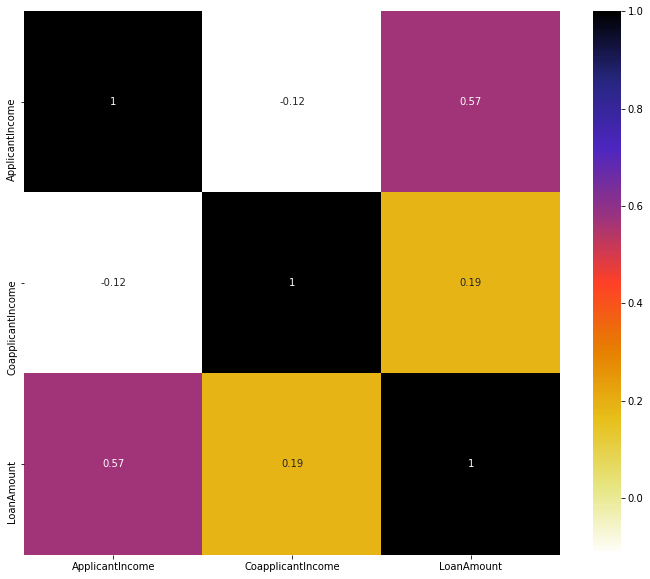

In [88]:
 #Displaying Correlation between varaibles using heatmap

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor = numerical_columns.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# **Feature Engineering**

In [89]:
# Checking for missing values

train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Handling of missing values

In [90]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) # Mode
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) # Mode
train['Married'].fillna(train['Married'].mode()[0], inplace=True) # Mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) # Mode

train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True) # Mean
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(), inplace=True) # Mean

In [91]:
train.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

### Handling Categorical variables

In [92]:
train.Loan_Status = train.Loan_Status.replace({"Y": 1, "N" : 0})
train.Gender = train.Gender.replace({"Male": 1, "Female" : 0})
train.Married = train.Married.replace({"Yes": 1, "No" : 0})
train.Self_Employed = train.Self_Employed.replace({"Yes": 1, "No" : 0})

In [93]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education']
le = LabelEncoder()
for col in feature_col:
  train[col] = le.fit_transform(train[col])

In [94]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


*Finally, We have all the features with numerical values*

## Data Preparation

In [95]:
########## Split Features and Target Varible ############
X = train[['Gender', 'Married', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']]
y = train['Loan_Status']

In [96]:
################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =10)

In [97]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 7), (123, 7), (491,), (123,))

# Model Building & Evaluation

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=35, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [99]:
y_pred = clf.predict(X_test)

In [100]:
accuracy_score(y_pred, y_test)

0.7967479674796748

In [101]:
confusion_matrix(y_pred, y_test)

array([[12,  1],
       [24, 86]])

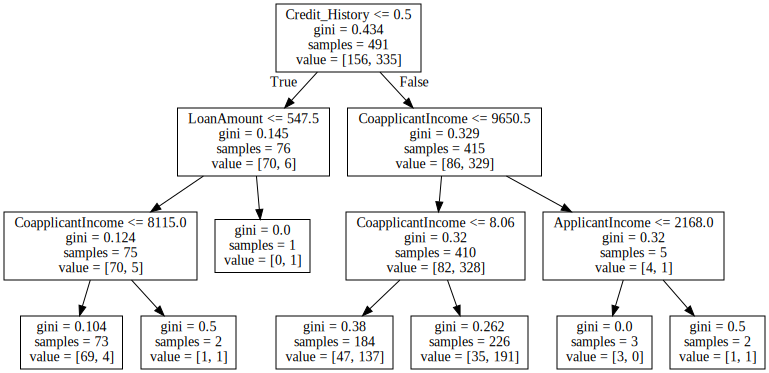

In [102]:
# Visulazing Decision Tree with Max Depth = 3

import graphviz 
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

Text(69.0, 0.5, 'Truth')

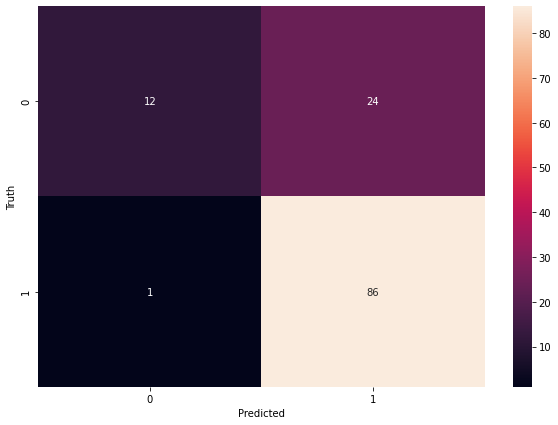

In [103]:
# Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [104]:
# saving the model 
import pickle 
pickle_out = open("/content/drive/MyDrive/Automatic Loan Prediction System/Automating_Loan_Prediction_Model.pkl", mode = "wb") 
pickle.dump(clf, pickle_out) 
pickle_out.close()

# Model Deployment of the Loan Prediction model using Streamlit

In [105]:
!pip install -q streamlit

In [106]:
!pip install -q pyngrok

In [107]:
!pip install -q streamlit_ace

In [108]:
%%writefile app.py
 
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('/content/drive/MyDrive/Automatic Loan Prediction System/Automating_Loan_Prediction_Model.pkl', 'rb') 
classifier = pickle.load(pickle_in)
 
@st.cache()
  
# defining the function which will make the prediction using the data which the user inputs 
def prediction(Gender, Married, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Credit_History):   
 
    # Pre-processing user input    
    if Gender == "Male":
        Gender = 0
    else:
        Gender = 1
 
    if Married == "Unmarried":
        Married = 0
    else:
        Married = 1

    if Self_Employed == "Yes":
       Self_Employed = 1
    else:
      Self_Employed = 0
 
    if Credit_History == "Unclear Debts":
        Credit_History = 0
    else:
        Credit_History = 1  
 
    LoanAmount = LoanAmount / 1000
 
    # Making predictions 
    prediction = classifier.predict( 
        [[Gender, Married, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Credit_History]])
     
    if prediction == 0:
        pred = 'Rejected'
    else:
        pred = 'Approved'
    return pred
      
  
# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:green;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Automated Loan Prediction App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    Gender = st.selectbox('Gender',("Male","Female"))
    Married = st.selectbox('Marital Status',("Unmarried","Married")) 
    Self_Employed = st.selectbox('Employment Status',("Self Employed","Non Self Employed"))
    ApplicantIncome = st.number_input("Applicants monthly income") 
    CoapplicantIncome = st.number_input("Co-Applicants monthly income")
    LoanAmount = st.number_input("Total loan amount")
    Credit_History = st.selectbox('Credit_History',("Unclear Debts","No Unclear Debts"))
    result =""
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(Gender, Married, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Credit_History) 
        st.success('Your loan is {}'.format(result))
        print(LoanAmount)
     
if __name__=='__main__': 
    main()

Writing app.py


In [109]:
!streamlit run app.py &>/dev/null&

In [110]:
from pyngrok import ngrok
 
public_url = ngrok.connect('8501')
public_url

<NgrokTunnel: "http://2b26ea9b410d.ngrok.io" -> "http://localhost:8501">

In [111]:
# RUN THIS CELL IF YOU WANT TO KILL ANY TUNNELS WHICH ARE RUNNING ON YOUR ID
ngrok.kill()